In [160]:
import pandas as pd
import matplotlib.pyplot as plt

from minisom import MiniSom
import numpy as np

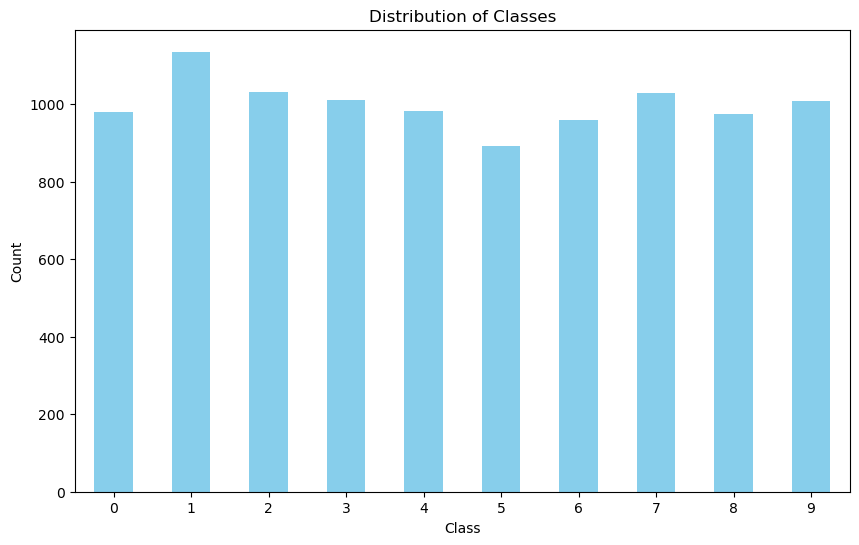

In [161]:
train_data = pd.read_csv("mnist_test.csv")

X_train = train_data.drop(columns=['label']).values
y_train = train_data['label'].values

class_counts = train_data['label'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
class_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

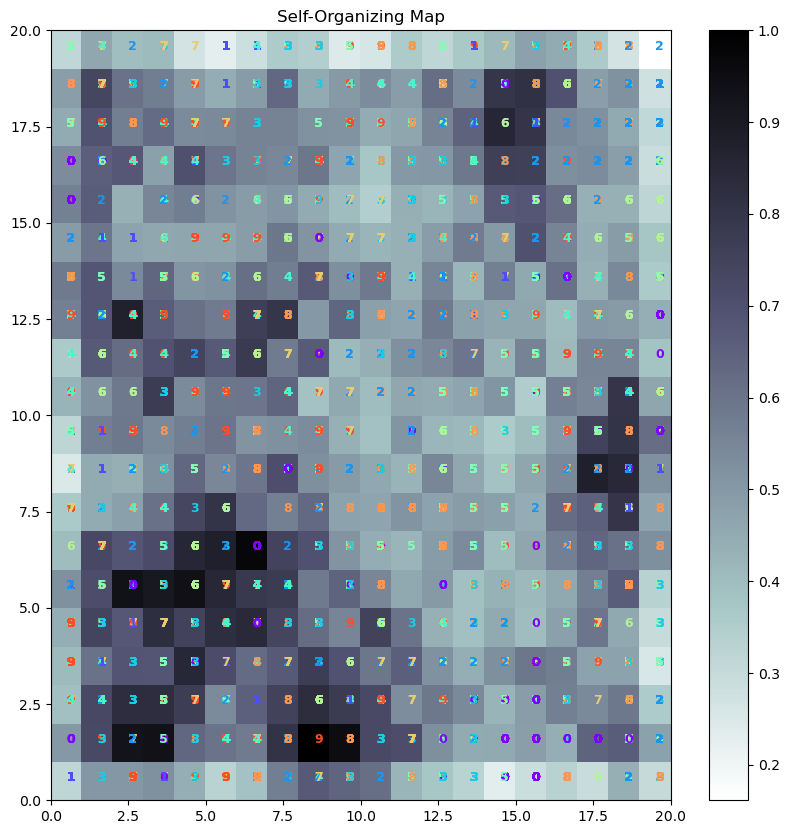

In [162]:
som_width = 20
som_height = 20
input_len = X_train.shape[1]

som = MiniSom(som_width, som_height, input_len, sigma=1.0, learning_rate=0.5)
som.random_weights_init(X_train)
som.train_random(X_train, 1000) 

plt.figure(figsize=(10, 10))
plt.pcolor(som.distance_map().T, cmap='bone_r')  
plt.colorbar()

# Построение карты весов
for i, (x, t) in enumerate(zip(X_train, y_train)):
    w = som.winner(x)
    plt.text(w[0] + 0.5, w[1] + 0.5, str(t), color=plt.cm.rainbow(t / 10.), fontdict={'weight': 'bold', 'size': 9})

plt.title('Self-Organizing Map')
plt.show()


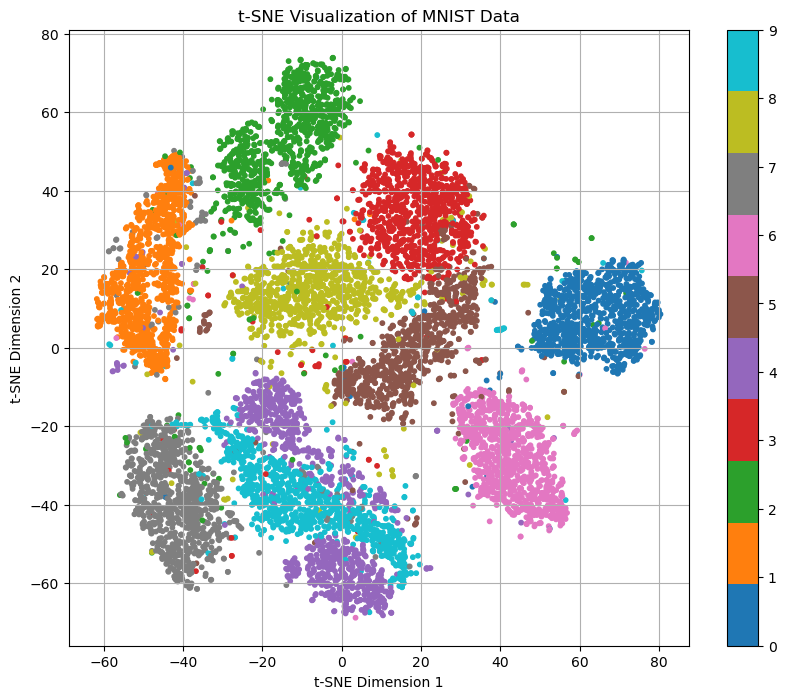

In [163]:
from sklearn.manifold import TSNE

# Применение алгоритма t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=50)
X_tsne = tsne.fit_transform(X_train)

plt.figure(figsize=(10, 8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_train, cmap=plt.cm.tab10, s=10)
plt.colorbar()
plt.title('t-SNE Visualization of MNIST Data')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.grid(True)
plt.show()

In [164]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

# Кластеризация на исходных данных с помощью kMeans
kmeans_original = KMeans(n_clusters=10, random_state=42)
y_pred_original = kmeans_original.fit_predict(X_train)

# Кластеризация на данных, преобразованных с помощью t-SNE
kmeans_tsne = KMeans(n_clusters=10, random_state=42)
y_pred_tsne = kmeans_tsne.fit_predict(X_tsne)

# Вычисление оценки согласованности кластерных решений Rand
rand_score_original = adjusted_rand_score(y_train, y_pred_original)
rand_score_tsne = adjusted_rand_score(y_train, y_pred_tsne)

print("Adjusted Rand Score (Original Data):", rand_score_original)
print("Adjusted Rand Score (t-SNE Data):", rand_score_tsne)


/Users/tainazitina/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Adjusted Rand Score (Original Data): 0.3790787886591178
Adjusted Rand Score (t-SNE Data): 0.7410076060049677


/Users/tainazitina/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


#### При perplexity=5 

Adjusted Rand Score (Original Data): 0.38

Adjusted Rand Score (t-SNE Data): 0.56

#### При perplexity=20

Adjusted Rand Score (Original Data): 0.38

Adjusted Rand Score (t-SNE Data): 0.66

#### При perplexity=50

Adjusted Rand Score (Original Data): 0.38

Adjusted Rand Score (t-SNE Data): 0.74

#### При perplexity=100

Adjusted Rand Score (Original Data): 0.38

Adjusted Rand Score (t-SNE Data): 0.73